In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
low_memory=False

In [3]:
paths = ['./dados/roubo-jan.csv','./dados/roubo-fev.csv','./dados/roubo-mar.csv','./dados/roubo-abril.csv']


In [8]:
def populaDf(paths):
    dfs = []
    for path in paths:
        df = pd.DataFrame(pd.read_csv(path, encoding='ISO-8859-1'))
        dfs.append(df)
        df = pd.concat(dfs)
    return df

In [10]:
df = populaDf(paths)

df.reset_index()
#df.columns
df.drop_duplicates()

/home/gabriel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,ANO_BO,ANO_FABRICACAO,ANO_MODELO,BAIRRO,BO_AUTORIA,BO_EMITIDO,BO_INICIADO,CIDADE,CIDADE_VEICULO,CORCUTIS,...,STATUS,TIPOPESSOA,TIPOVINCULO,UF,UF_VEICULO,Unnamed: 11,Unnamed: 54,Unnamed: 55,Unnamed: 56,VITIMAFATAL
0,NaN,NaN,NaN,PARQUE NOVO HORIZONTE,NaN,NaN,31/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,CENTRO,NaN,NaN,10/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,JARDIM ESTORIL,NaN,NaN,21/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,JARDIM DAS INDï¿½STRIAS,NaN,NaN,5397/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,JARDIM IMPERIAL,NaN,NaN,17/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,URBANOVA,NaN,NaN,34/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,CONJUNTO HABITACIONAL DOM PEDRO II,NaN,NaN,24/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,JARDIM VALPARAï¿½BA,NaN,NaN,22/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,56/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,VILA IRACEMA,NaN,NaN,12648/2019,S.JOSE DOS CAMPOS,NaN,NaN,...,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN


## 10 Bairros de São José dos Campos que mais houveram roubos de celulares de jan/2019 - mar/2019

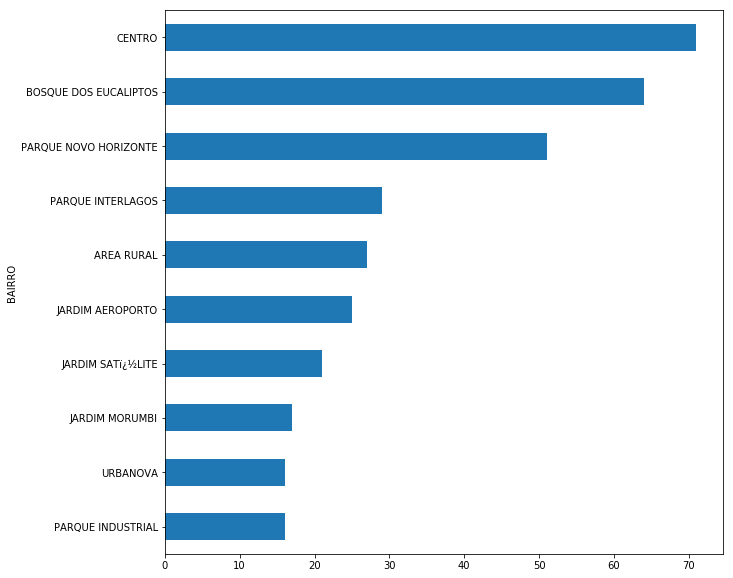

In [11]:
df.groupby('BAIRRO').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))

## Periodos que mais houveram roubos de celulares em São José dos Campos,  de jan/2019 - mar/2019

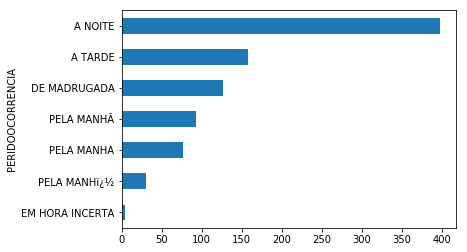

In [12]:
df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='barh')

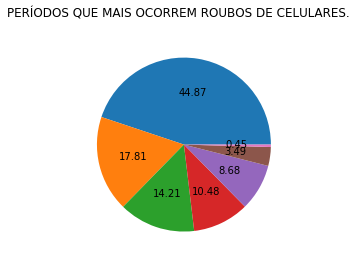

In [13]:
plt.axis('equal')
plt.pie(df['PERIDOOCORRENCIA'].value_counts(), autopct="%.2f")
plt.suptitle("PERÍODOS QUE MAIS OCORREM ROUBOS DE CELULARES.")
plt.show()

## Logradouros que mais ocorreram roubos de celulares em São José dos Campos, de jan/2019 - mar/2019

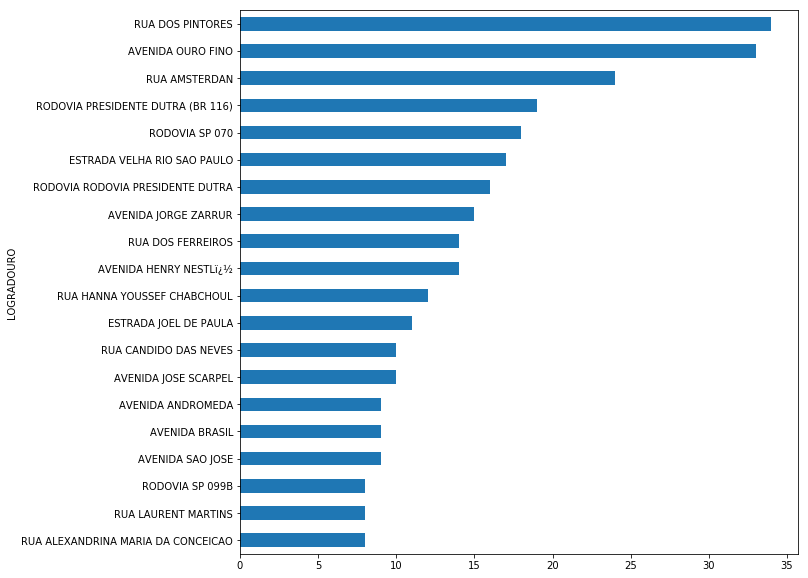

In [14]:
df.groupby('LOGRADOURO').size().sort_values().tail(20).plot(kind='barh', figsize=(10, 10))

## HeatMap das áreas onde mais houveram roubos registrados de jan/2019 - mar/2019

In [17]:
coordenadas = []
geolocalizacoes = df[['LATITUDE', 'LONGITUDE']]
print(geolocalizacoes)
#tem que tirar esses NaN da tabela
lat = geolocalizacoes['LATITUDE'].values
long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791,-45.8872],tiles='OpenStreetMap',zoom_start=12)

for la, lo in zip(lat, long):
    coordenadas.append([la,lo])
mapa.add_child(plugins.HeatMap(coordenadas))

     LATITUDE     LONGITUDE
0       -23.0  1.979849e+12
1       -23.0  1.979849e+12
2       -23.0  1.979849e+12
3       -23.0  1.979849e+12
4       -23.0  1.979849e+12
5       -23.0  1.979849e+12
6       -23.0  1.979849e+12
7       -23.0  1.979849e+12
8       -23.0  1.979849e+12
9       -23.0  1.979849e+12
10      -23.0  1.979849e+12
11      -23.0  1.979849e+12
12      -23.0  1.979849e+12
13      -23.0  1.979849e+12
14      -23.0  1.870879e+12
15      -23.0  2.499806e+12
16      -23.0  2.237670e+08
17      -23.0  2.759470e+08
18      -23.0  2.028281e+12
19      -23.0  2.737700e+08
20      -23.0  1.773904e+08
21      -23.0  2.472448e+06
22      -23.0  1.748299e+06
23      -23.0  2.311662e+11
24      -23.0  2.028281e+12
25      -23.0  2.028281e+12
26      -23.0  2.028281e+12
27      -23.0  2.028281e+12
28      -23.0  2.028281e+12
29      -23.0  2.028281e+12
..        ...           ...
258     -23.0  1.048118e+06
259     -23.0  1.318815e+12
260     -23.0  1.318815e+12
261     -23.0  1.318

ValueError: Location values cannot contain NaNs.